In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

# Pré-processamento

In [16]:
# Caminho para o arquivo
file_path = 'C:\\Users\\User\\Documents\\CDD\\PB\\TP5\\1481.xlsx (tratado).xlsx'

# Carregar as abas relevantes
sheet_names = ['Dom-1990-1999', 'Dom-2000-2009', 'Dom-2010-2019', 'Dom-2020-2023']
dfs = [pd.read_excel(file_path, sheet_name=sheet) for sheet in sheet_names]

# Mesclar os DataFrames com base em 'Área/Região' e 'Bairro'
merged_df = dfs[0]

for df in dfs[1:]:
    # Mesclar os dados
    merged_df = pd.merge(merged_df, df, on=['Área/Região', 'Bairro'], how='outer', suffixes=('', '_new'))
    
    # Tratar colunas duplicadas resultantes da fusão
    for col in df.columns:
        if col not in ['Área/Região', 'Bairro'] and f"{col}_new" in merged_df.columns:
            merged_df[col] = merged_df[col].combine_first(merged_df.pop(f"{col}_new"))

# Ordenar as colunas, colocando 'Área/Região', 'Bairro' no início e os anos em sequência
columns_order = ['Área/Região', 'Bairro'] + sorted([col for col in merged_df.columns if col not in ['Área/Região', 'Bairro']])
merged_df = merged_df[columns_order]

c:\Users\User\Documents\CDD\PB\.venv\Lib\site-packages\openpyxl\packaging\custom.py:213: UserWarning: Unknown type for ESRI_WORKBOOK_ID
  warn(f"Unknown type for {prop.name}")
c:\Users\User\Documents\CDD\PB\.venv\Lib\site-packages\openpyxl\packaging\custom.py:213: UserWarning: Unknown type for ESRI_WORKBOOK_ID
  warn(f"Unknown type for {prop.name}")
c:\Users\User\Documents\CDD\PB\.venv\Lib\site-packages\openpyxl\packaging\custom.py:213: UserWarning: Unknown type for ESRI_WORKBOOK_ID
  warn(f"Unknown type for {prop.name}")
c:\Users\User\Documents\CDD\PB\.venv\Lib\site-packages\openpyxl\packaging\custom.py:213: UserWarning: Unknown type for ESRI_WORKBOOK_ID
  warn(f"Unknown type for {prop.name}")


In [17]:
merged_df

,Área/Região,Bairro,1990,1991,1992,1993,1994,1995,1996,1997,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Coleta Seletiva,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,19462.18,14946.31,14797.32,14715.01
1,Região de Planejamento 1.1 - Centro,Centro,92353.0,95657.0,85184.0,0.0,43008.0,0.0,42063.69,49517.69,...,37968.936493,42414.00,37891.00,35482.00,32477.29,30843.620,23222.57,20403.54,20091.93,19998.36
2,Região de Planejamento 1.1 - Centro,Paquetá,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,...,1348.742262,0.00,0.00,0.00,0.00,0.000,0.00,0.00,0.00,0.00
3,Região de Planejamento 1.1 - Centro,Portuária,0.0,0.0,0.0,84410.0,35916.0,0.0,11385.88,15547.02,...,11524.372954,11172.00,9537.00,10295.00,9149.18,13713.848,8212.39,9124.92,14766.12,14226.36
4,Região de Planejamento 1.1 - Centro,Rio Comprido,0.0,0.0,0.0,0.0,13602.0,0.0,15625.52,18037.00,...,18776.536995,23692.00,21261.00,20250.00,19647.01,20639.220,24098.95,28518.79,29652.05,30211.28
5,Região de Planejamento 1.1 - Centro,Santa Teresa,0.0,0.0,0.0,0.0,8248.0,0.0,13080.38,13419.49,...,17500.268471,17563.00,13425.00,13040.00,13168.20,11898.020,0.00,0.00,0.00,0.00
6,Região de Planejamento 1.1 - Centro,São Cristóvão,0.0,0.0,0.0,0.0,28965.0,0.0,19480.56,21524.80,...,23257.955652,25363.00,23011.00,20933.00,21080.34,16783.140,15355.85,14852.79,13043.88,12857.89
7,Região de Planejamento 2.1 - Zona Sul,Botafogo,216607.0,223372.0,199342.0,190613.0,82333.0,0.0,68299.96,81967.34,...,63025.103540,64691.00,58799.00,59346.00,58474.33,56090.180,49413.91,48520.93,45490.01,44672.25
8,Região de Planejamento 2.1 - Zona Sul,Copacabana,0.0,0.0,0.0,0.0,41071.0,0.0,51555.40,59287.08,...,43597.514951,43634.00,39279.00,39193.00,38382.72,38597.790,35411.46,35749.56,35709.43,32555.26
9,Região de Planejamento 2.1 - Zona Sul,Lagoa,0.0,0.0,0.0,0.0,52919.0,0.0,62767.69,61662.66,...,55668.226524,78863.00,71159.00,68260.51,66304.14,66156.980,66112.79,66069.00,61027.10,51877.64


In [18]:
merged_df.dtypes

Área/Região     object
Bairro          object
1990           float64
1991           float64
1992           float64
1993           float64
1994           float64
1995           float64
1996           float64
1997           float64
1998           float64
1999           float64
2000           float64
2001           float64
2002           float64
2003           float64
2004           float64
2005           float64
2006           float64
2007           float64
2008           float64
2009           float64
2010           float64
2011           float64
2012           float64
2013           float64
2014           float64
2015           float64
2016           float64
2017           float64
2018           float64
2019           float64
2020           float64
2021           float64
2022           float64
2023           float64
dtype: object

In [19]:
# Preencher valores ausentes com zero
merged_df.fillna(0, inplace=True)

# Converter os valores das colunas numéricas para o tipo int, exceto 'Área/Região' e 'Bairro'
cols_to_convert = merged_df.columns[2:]
merged_df[cols_to_convert] = merged_df[cols_to_convert].astype(int)

merged_df.dtypes

Área/Região    object
Bairro         object
1990            int64
1991            int64
1992            int64
1993            int64
1994            int64
1995            int64
1996            int64
1997            int64
1998            int64
1999            int64
2000            int64
2001            int64
2002            int64
2003            int64
2004            int64
2005            int64
2006            int64
2007            int64
2008            int64
2009            int64
2010            int64
2011            int64
2012            int64
2013            int64
2014            int64
2015            int64
2016            int64
2017            int64
2018            int64
2019            int64
2020            int64
2021            int64
2022            int64
2023            int64
dtype: object

In [20]:
merged_df = merged_df.drop(0)
merged_df

,Área/Região,Bairro,1990,1991,1992,1993,1994,1995,1996,1997,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
1,Região de Planejamento 1.1 - Centro,Centro,92353,95657,85184,0,43008,0,42063,49517,...,37968,42414,37891,35482,32477,30843,23222,20403,20091,19998
2,Região de Planejamento 1.1 - Centro,Paquetá,0,0,0,0,0,0,0,0,...,1348,0,0,0,0,0,0,0,0,0
3,Região de Planejamento 1.1 - Centro,Portuária,0,0,0,84410,35916,0,11385,15547,...,11524,11172,9537,10295,9149,13713,8212,9124,14766,14226
4,Região de Planejamento 1.1 - Centro,Rio Comprido,0,0,0,0,13602,0,15625,18037,...,18776,23692,21261,20250,19647,20639,24098,28518,29652,30211
5,Região de Planejamento 1.1 - Centro,Santa Teresa,0,0,0,0,8248,0,13080,13419,...,17500,17563,13425,13040,13168,11898,0,0,0,0
6,Região de Planejamento 1.1 - Centro,São Cristóvão,0,0,0,0,28965,0,19480,21524,...,23257,25363,23011,20933,21080,16783,15355,14852,13043,12857
7,Região de Planejamento 2.1 - Zona Sul,Botafogo,216607,223372,199342,190613,82333,0,68299,81967,...,63025,64691,58799,59346,58474,56090,49413,48520,45490,44672
8,Região de Planejamento 2.1 - Zona Sul,Copacabana,0,0,0,0,41071,0,51555,59287,...,43597,43634,39279,39193,38382,38597,35411,35749,35709,32555
9,Região de Planejamento 2.1 - Zona Sul,Lagoa,0,0,0,0,52919,0,62767,61662,...,55668,78863,71159,68260,66304,66156,66112,66069,61027,51877
10,Região de Planejamento 2.1 - Zona Sul,Rocinha,0,0,0,0,0,0,0,0,...,23857,0,0,0,0,0,0,0,0,8905


# Visualizações

### 1. Gráfico de linha: Total de lixo ao longo dos anos

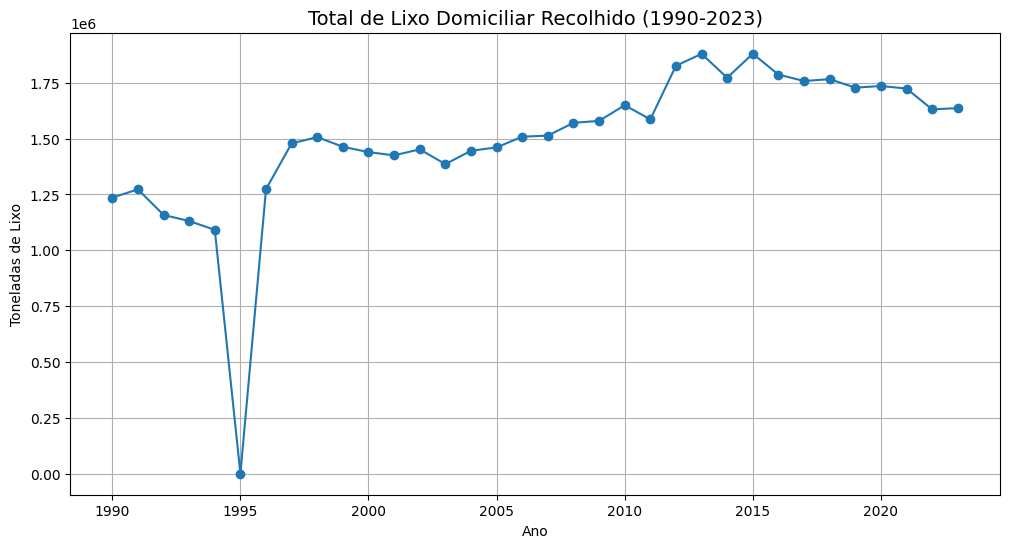

In [ ]:
# Soma o lixo de todas as regiões por ano
total_lixo = merged_df.iloc[:, 2:].sum(axis=0)

total_lixo.index = total_lixo.index.astype(int)

# Plotando os dados
plt.figure(figsize=(12, 6))
plt.plot(total_lixo.index, total_lixo.values, marker='o')
plt.title('Total de lixo domiciliar recolhido (1990-2023)', fontsize=14)
plt.xlabel('Ano')
plt.ylabel('Toneladas de lixo')
plt.grid(True)
plt.show()

### 2. Gráfico de Barras: Comparação do Total de Lixo por Região em um Ano Específico

In [23]:
merged_df.columns

Index(['Área/Região',      'Bairro',          1990,          1991,
                1992,          1993,          1994,          1995,
                1996,          1997,          1998,          1999,
                2000,          2001,          2002,          2003,
                2004,          2005,          2006,          2007,
                2008,          2009,          2010,          2011,
                2012,          2013,          2014,          2015,
                2016,          2017,          2018,          2019,
                2020,          2021,          2022,          2023],
      dtype='object')

C:\Users\User\AppData\Local\Temp\ipykernel_5328\1119229530.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ano_especifico, y='Área/Região', data=dados_ano, palette='viridis')


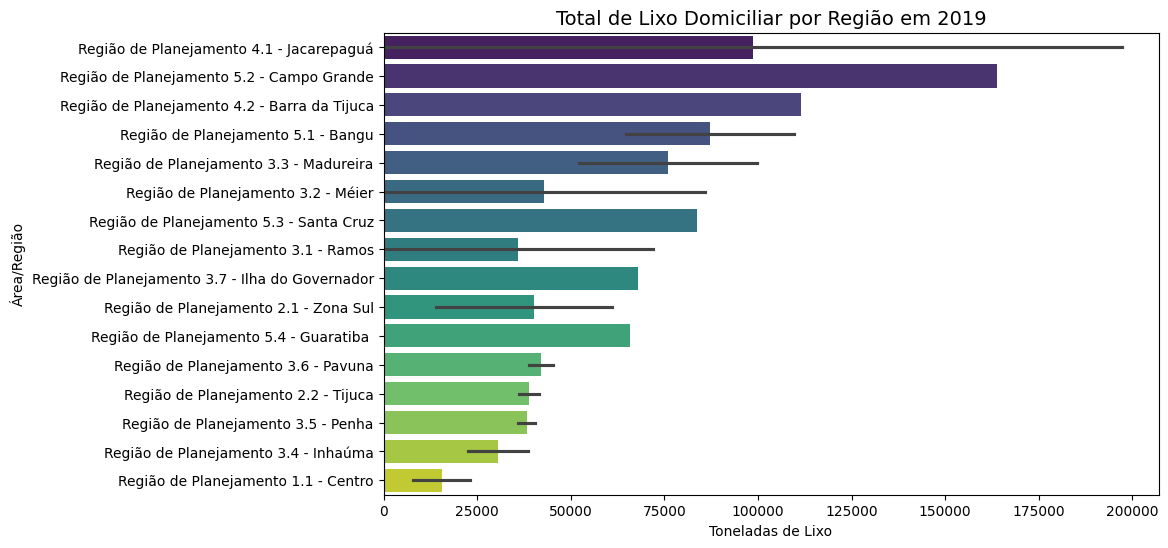

In [ ]:
ano_especifico = 2019
dados_ano = merged_df[['Área/Região', ano_especifico]].sort_values(by=ano_especifico, ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=ano_especifico, y='Área/Região', data=dados_ano, palette='viridis')
plt.title(f'Total de Lixo Domiciliar por Região em {ano_especifico}', fontsize=14)
plt.xlabel('Toneladas de Lixo')
plt.ylabel('Área/Região')
plt.show()

### 3. Heatmap: Intensidade de Lixo por Região e Ano

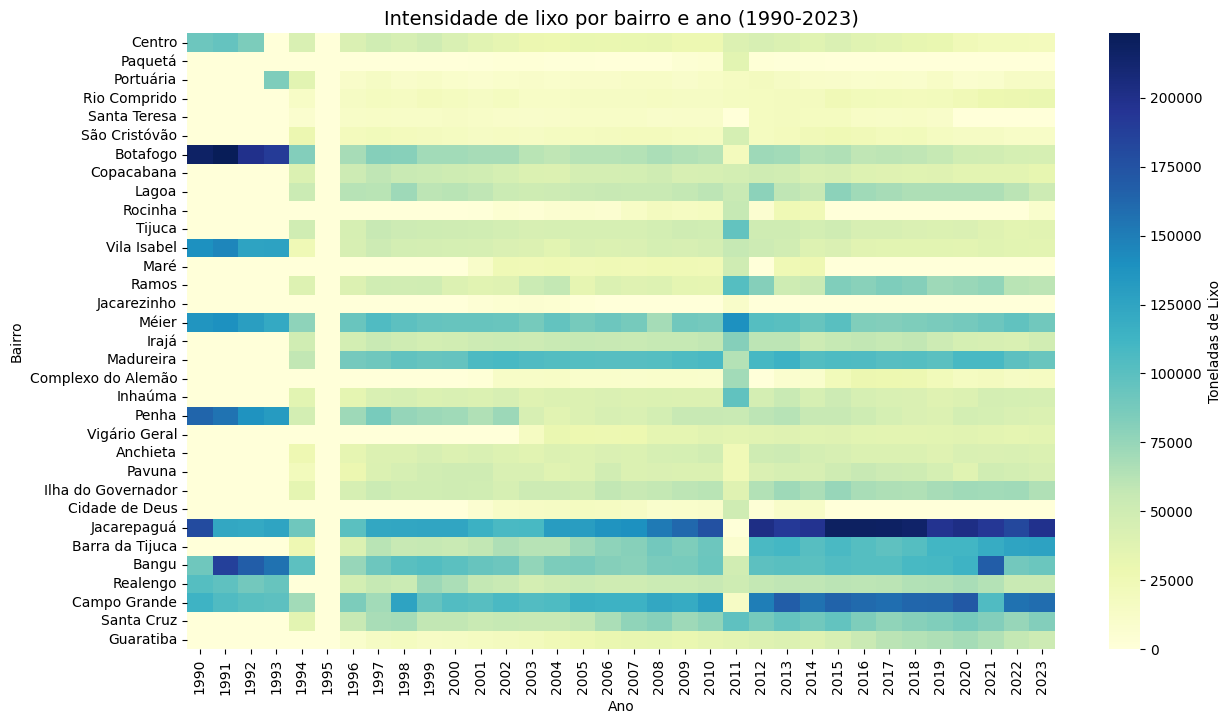

In [26]:
heatmap_data = merged_df.set_index('Bairro').iloc[:, 1:]

plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', cbar_kws={'label': 'Toneladas de Lixo'})
plt.title('Intensidade de lixo por bairro e ano (1990-2023)', fontsize=14)
plt.xlabel('Ano')
plt.ylabel('Bairro')
plt.show()

### 4. Gráfico de Área: Comparação do Crescimento do Lixo por Região

Dimensões do DataFrame transposto:
(34, 33)
Área/Região
Região de Planejamento 1.1 - Centro                int64
Região de Planejamento 1.1 - Centro                int64
Região de Planejamento 1.1 - Centro                int64
Região de Planejamento 1.1 - Centro                int64
Região de Planejamento 1.1 - Centro                int64
Região de Planejamento 1.1 - Centro                int64
Região de Planejamento 2.1 - Zona Sul              int64
Região de Planejamento 2.1 - Zona Sul              int64
Região de Planejamento 2.1 - Zona Sul              int64
Região de Planejamento 2.1 - Zona Sul              int64
Região de Planejamento 2.2 - Tijuca                int64
Região de Planejamento 2.2 - Tijuca                int64
Região de Planejamento 3.1 - Ramos                 int64
Região de Planejamento 3.1 - Ramos                 int64
Região de Planejamento 3.2 - Méier                 int64
Região de Planejamento 3.2 - Méier                 int64
Região de Planejamento 3.3 - Mad

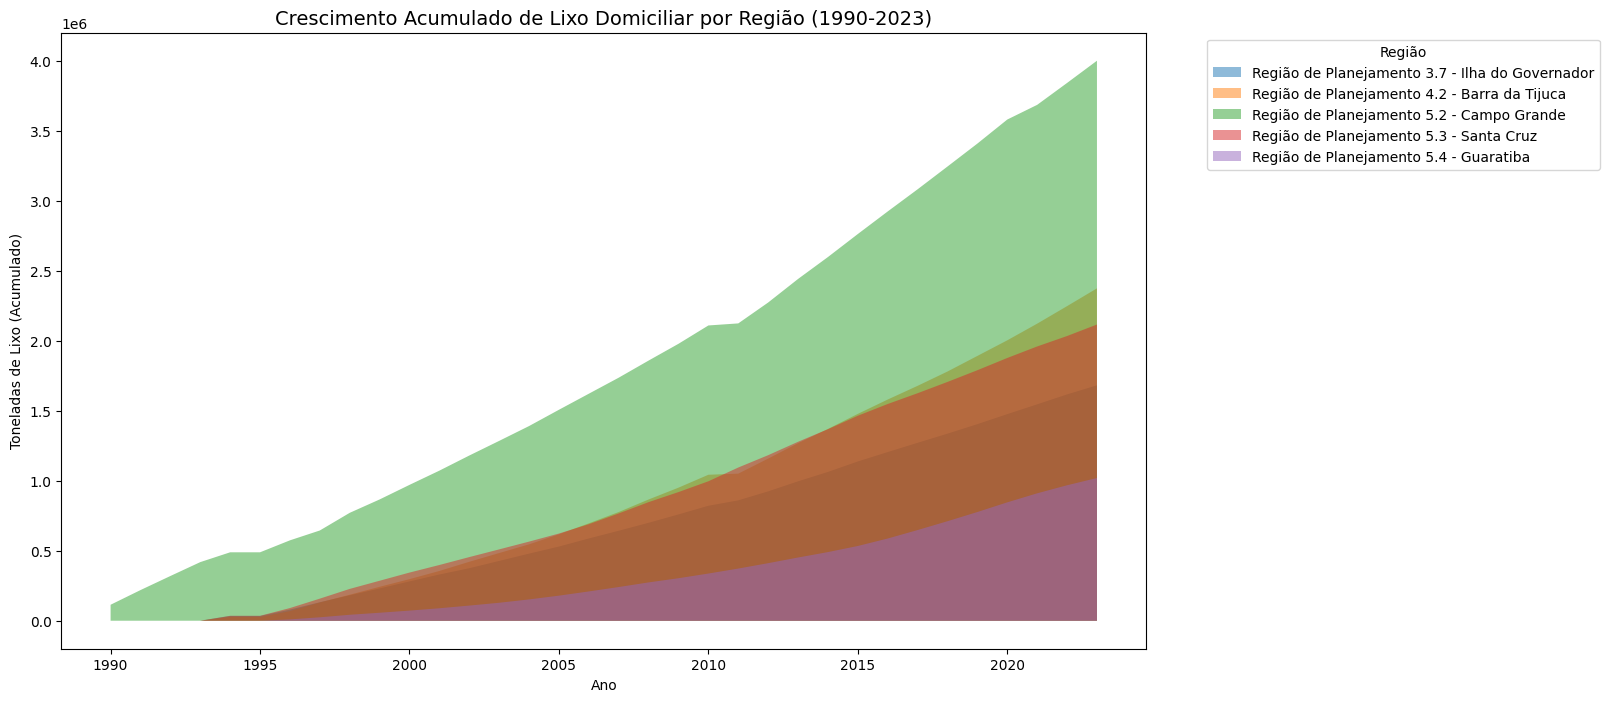

In [32]:
# Garantir que os dados estejam corretos
df_cumsum = (
    merged_df.set_index('Área/Região')
    .iloc[:, 1:]  # Selecionar apenas colunas numéricas
    .apply(pd.to_numeric, errors='coerce')  # Converter para numérico
    .fillna(0)  # Substituir NaN por 0
    .cumsum(axis=1)  # Calcular o acumulado
    .T  # Transpor (anos como índice)
)

# Converter índice para numérico
df_cumsum.index = pd.to_numeric(df_cumsum.index, errors='coerce')

# Depuração: verificar dimensões
print("Dimensões do DataFrame transposto:")
print(df_cumsum.shape)
print(df_cumsum.dtypes)

# Garantir que os dados são unidimensionais
plt.figure(figsize=(14, 8))
for regiao in df_cumsum.columns:
    col_data = df_cumsum[regiao]
    if col_data.ndim != 1:  # Checar unidimensionalidade
        print(f"A coluna '{regiao}' não é unidimensional.")
        continue
    plt.fill_between(df_cumsum.index, col_data, label=regiao, alpha=0.5)

# Configurações do gráfico
plt.title('Crescimento Acumulado de Lixo Domiciliar por Região (1990-2023)', fontsize=14)
plt.xlabel('Ano')
plt.ylabel('Toneladas de Lixo (Acumulado)')
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), title='Região')
plt.show()


In [33]:
# Renomear colunas duplicadas para torná-las únicas
df_cumsum.columns = pd.Index([f"{col}_{i}" if col in df_cumsum.columns[:i].tolist() else col 
                              for i, col in enumerate(df_cumsum.columns)])

print("Novos nomes das colunas:")
print(df_cumsum.columns)

Novos nomes das colunas:
Index(['Região de Planejamento 1.1 - Centro',
       'Região de Planejamento 1.1 - Centro_1',
       'Região de Planejamento 1.1 - Centro_2',
       'Região de Planejamento 1.1 - Centro_3',
       'Região de Planejamento 1.1 - Centro_4',
       'Região de Planejamento 1.1 - Centro_5',
       'Região de Planejamento 2.1 - Zona Sul',
       'Região de Planejamento 2.1 - Zona Sul_7',
       'Região de Planejamento 2.1 - Zona Sul_8',
       'Região de Planejamento 2.1 - Zona Sul_9',
       'Região de Planejamento 2.2 - Tijuca',
       'Região de Planejamento 2.2 - Tijuca_11',
       'Região de Planejamento 3.1 - Ramos',
       'Região de Planejamento 3.1 - Ramos_13',
       'Região de Planejamento 3.2 - Méier',
       'Região de Planejamento 3.2 - Méier_15',
       'Região de Planejamento 3.3 - Madureira',
       'Região de Planejamento 3.3 - Madureira_17',
       'Região de Planejamento 3.4 - Inhaúma',
       'Região de Planejamento 3.4 - Inhaúma_19',
       'Regi

In [34]:
df_cumsum = df_cumsum.groupby(df_cumsum.columns, axis=1).sum()
print("Colunas agrupadas e somadas:")
print(df_cumsum.columns)

Colunas agrupadas e somadas:
Index(['Região de Planejamento 1.1 - Centro',
       'Região de Planejamento 1.1 - Centro_1',
       'Região de Planejamento 1.1 - Centro_2',
       'Região de Planejamento 1.1 - Centro_3',
       'Região de Planejamento 1.1 - Centro_4',
       'Região de Planejamento 1.1 - Centro_5',
       'Região de Planejamento 2.1 - Zona Sul',
       'Região de Planejamento 2.1 - Zona Sul_7',
       'Região de Planejamento 2.1 - Zona Sul_8',
       'Região de Planejamento 2.1 - Zona Sul_9',
       'Região de Planejamento 2.2 - Tijuca',
       'Região de Planejamento 2.2 - Tijuca_11',
       'Região de Planejamento 3.1 - Ramos',
       'Região de Planejamento 3.1 - Ramos_13',
       'Região de Planejamento 3.2 - Méier',
       'Região de Planejamento 3.2 - Méier_15',
       'Região de Planejamento 3.3 - Madureira',
       'Região de Planejamento 3.3 - Madureira_17',
       'Região de Planejamento 3.4 - Inhaúma',
       'Região de Planejamento 3.4 - Inhaúma_19',
       '

C:\Users\User\AppData\Local\Temp\ipykernel_5328\3271212604.py:1: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  df_cumsum = df_cumsum.groupby(df_cumsum.columns, axis=1).sum()


In [35]:
# Identificar colunas duplicadas
duplicated_columns = df_cumsum.columns[df_cumsum.columns.duplicated()]
print("Colunas duplicadas:")
print(duplicated_columns)

# Exibir exemplo dos dados dessas colunas
for col in duplicated_columns:
    print(f"\nDados da coluna '{col}':")
    print(df_cumsum[col])

Colunas duplicadas:
Index([], dtype='object')


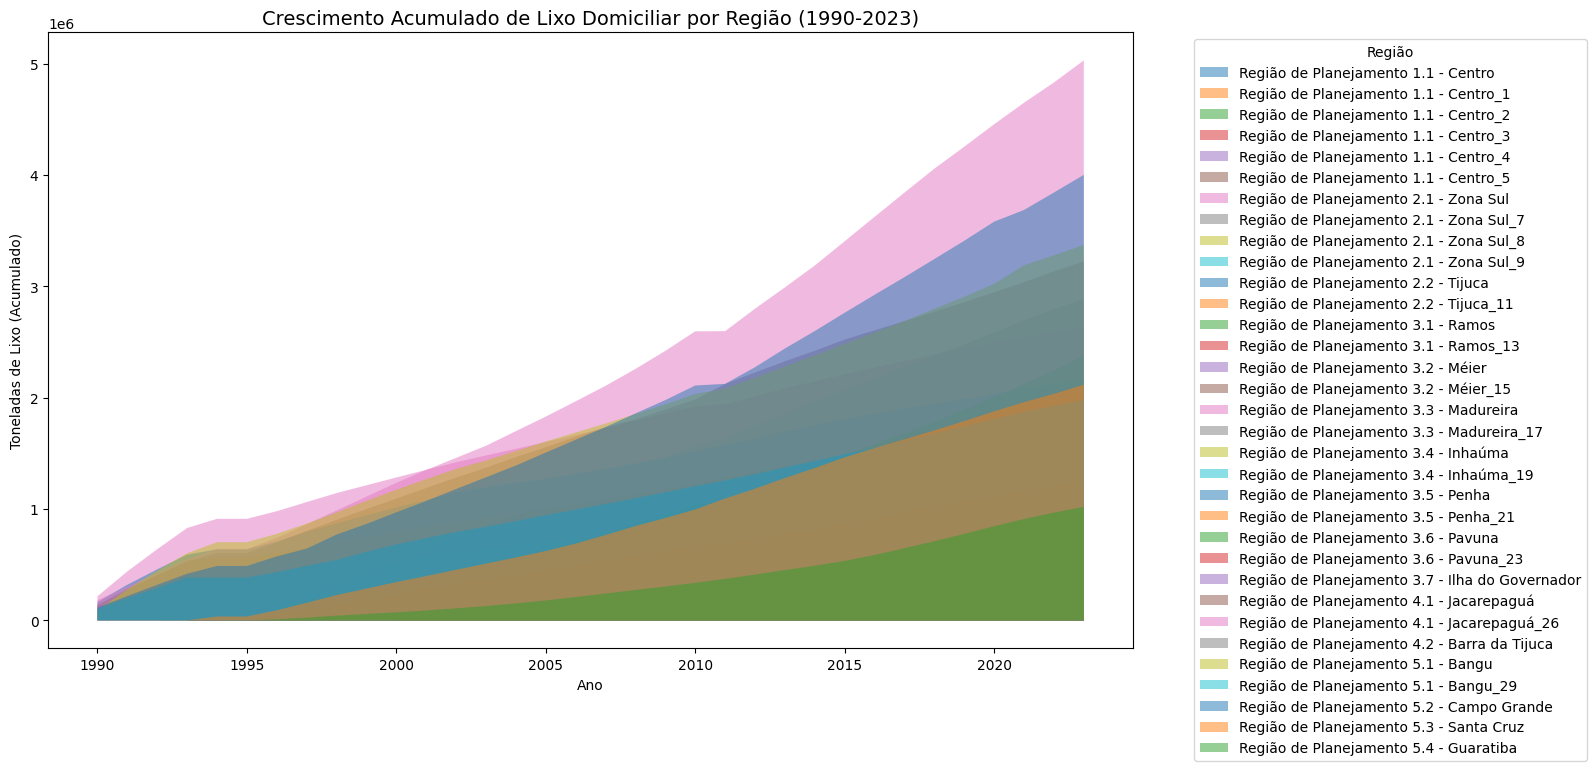

In [36]:
# Garantir que os dados são unidimensionais
plt.figure(figsize=(14, 8))
for regiao in df_cumsum.columns:
    col_data = df_cumsum[regiao]
    if col_data.ndim != 1:  # Checar unidimensionalidade
        print(f"A coluna '{regiao}' ainda não é unidimensional.")
        continue
    plt.fill_between(df_cumsum.index, col_data, label=regiao, alpha=0.5)

# Configurações do gráfico
plt.title('Crescimento Acumulado de Lixo Domiciliar por Região (1990-2023)', fontsize=14)
plt.xlabel('Ano')
plt.ylabel('Toneladas de Lixo (Acumulado)')
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), title='Região')
plt.show()